In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Yeast\Yeast_NG_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,NaN
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,NaN,0.53,0.22
3,0.58,0.44,0.57,NaN,0.5,0.0,NaN,0.22
4,0.42,0.44,0.48,0.54,NaN,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.82,NaN,0.47,0.18,0.5,0.0,0.50,0.22
1480,0.35,0.29,0.46,0.14,0.5,0.0,0.54,NaN
1481,0.41,0.47,0.50,0.14,0.5,0.0,0.53,0.37
1482,0.51,0.45,0.62,0.25,0.5,0.0,NaN,0.22


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	111
float64		column 2	111
float64		column 3	148
float64		column 4	222
float64		column 5	74
float64		column 6	148
float64		column 7	222
float64		column 8	148


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,1373.000000,1373.000000,1336.000000,1262.000000,1410.000000,1336.000000,1262.000000,1336.000000
mean,0.500488,0.498019,0.499162,0.260420,0.504965,0.007710,0.500444,0.275487
std,0.135861,0.120988,0.085350,0.131796,0.049592,0.076485,0.053130,0.103155
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.130000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.570000,0.570000,0.550000,0.310000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,0.870000,1.000000,0.830000,0.730000,1.000000


<AxesSubplot:>

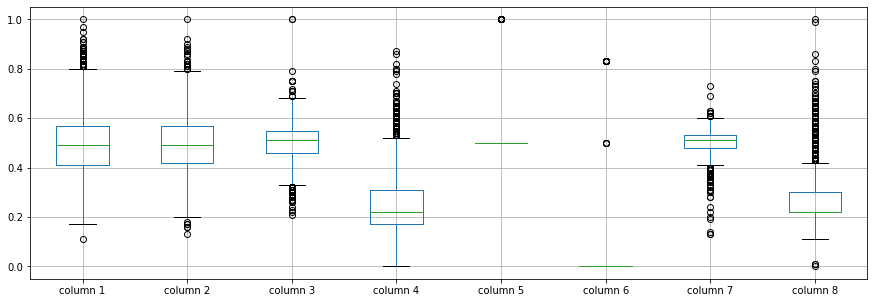

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.500488
column 2    0.498019
column 3    0.499162
column 4    0.260420
column 5    0.504965
column 6    0.007710
column 7    0.500444
column 8    0.275487
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.576322,-0.166152,0.164921,0.051234,0.015253,0.047551,-0.111738
column 2,0.576322,1.000000,-0.268339,0.159048,0.042494,0.008407,0.101998,-0.106996
column 3,-0.166152,-0.268339,1.000000,0.052651,-0.008144,0.031585,-0.184644,-0.026056
column 4,0.164921,0.159048,0.052651,1.000000,-0.004370,-0.009147,-0.089156,-0.036459
column 5,0.051234,0.042494,-0.008144,-0.004370,1.000000,-0.009732,0.047056,-0.003372
column 6,0.015253,0.008407,0.031585,-0.009147,-0.009732,1.000000,0.003351,-0.031348
column 7,0.047551,0.101998,-0.184644,-0.089156,0.047056,0.003351,1.000000,0.114839
column 8,-0.111738,-0.106996,-0.026056,-0.036459,-0.003372,-0.031348,0.114839,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+65,8+65+65,8+65+65+65,8+65+65+65+65,8+65+65+65+65+65,8+65+65+65+65+65+65,8+65+65+65+65+65,8+65+65+65+65,8+65+65+65,8+65+65,8+65,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 2.5642640772073166
Epoch: 1 , loss: 2.160208004972209
Epoch: 2 , loss: 1.995278872873472
Epoch: 3 , loss: 1.8694079570148303
Epoch: 4 , loss: 1.752617666254873
Epoch: 5 , loss: 1.6897600370904673
Epoch: 6 , loss: 1.613705505495486
Epoch: 7 , loss: 1.5457057317961818
Epoch: 8 , loss: 1.4523258831190027
Epoch: 9 , loss: 1.4293963701828667
Epoch: 10 , loss: 1.3906798479349718
Epoch: 11 , loss: 1.3405410900064136
Epoch: 12 , loss: 1.312094830300497
Epoch: 13 , loss: 1.2666050338226815
Epoch: 14 , loss: 1.2472616090722706
Epoch: 15 , loss: 1.2139421416365581
Epoch: 16 , loss: 1.1857351634813391
Epoch: 17 , loss: 1.1804034774718077
Epoch: 18 , loss: 1.138953988318858
Epoch: 19 , loss: 1.1129891347625982
Epoch: 20 , loss: 1.1054154595603114
Epoch: 21 , loss: 1.097434845307599
Epoch: 22 , loss: 1.0920840041792912
Epoch: 23 , loss: 1.0507670167995535
Epoch: 24 , loss: 1.0510535246652106
Epoch: 25 , loss: 1.03520

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(1484, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.43
column 2    0.44
column 3    0.48
column 4    0.22
column 5    0.50
column 6    0.00
column 7    0.51
column 8    0.22
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Yeast.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016852
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.000000,0.000000,0.000000,0.000000,-0.000194,0.000000,0.000000
3,0.0,0.000000,0.000000,0.155537,0.000000,0.000000,0.020169,0.000000
4,0.0,0.000000,0.000000,0.000000,0.135689,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
1479,0.0,-0.149608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1480,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.416744
1481,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1482,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-0.084459,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(5.464773422141345, 46.90414374018569)

In [17]:
NRMS=numerator/denominator
NRMS


0.11650939525539904

In [18]:
new_df.iloc[66,:]

column 1    0.46
column 2    0.49
column 3    0.58
column 4    0.23
column 5    0.50
column 6    0.00
column 7    0.44
column 8    0.22
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.610000,0.470000,0.130000,0.500000,0.000000,0.480000,0.236852
1,0.43,0.670000,0.480000,0.270000,0.500000,0.000000,0.530000,0.220000
2,0.64,0.620000,0.490000,0.150000,0.500000,-0.000194,0.530000,0.220000
3,0.58,0.440000,0.570000,0.285537,0.500000,0.000000,0.560169,0.220000
4,0.42,0.440000,0.480000,0.540000,0.635689,0.000000,0.480000,0.220000
...,...,...,...,...,...,...,...,...
1479,0.82,0.480392,0.470000,0.180000,0.500000,0.000000,0.500000,0.220000
1480,0.35,0.290000,0.460000,0.140000,0.500000,0.000000,0.540000,0.243256
1481,0.41,0.470000,0.500000,0.140000,0.500000,0.000000,0.530000,0.370000
1482,0.51,0.450000,0.620000,0.250000,0.500000,0.000000,0.505541,0.220000


In [20]:
imputations[-1].to_excel("Yeast_NG_10(imp).xlsx", index=False, header=False)